# 로이터 뉴스 분류하기 (Reuters News Classfication)

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import reuters

In [3]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

print('훈련용 뉴스 기사 :', len(x_train))
print('테스트용 뉴스 기사 :', len(x_test))
num_classes = len(set(y_train))
print('카테고리 : ', num_classes)

2113536/2110848 [==============================] - 0s 0us/step
훈련용 뉴스 기사 : 8982
테스트용 뉴스 기사 : 2246
카테고리 :  46


C:\Users\kwon_notebook\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\keras\datasets\reuters.py:113: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\kwon_notebook\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\keras\datasets\reuters.py:114: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [5]:
print('첫번째 훈련용 뉴스 기사 :', x_train[0])
print('첫번째 훈련용 뉴스 기사의 레이블 :', y_train[0])

첫번째 훈련용 뉴스 기사 : [1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
첫번째 훈련용 뉴스 기사의 레이블 : 3


뉴스 기사의 최대 길이 :  2376
뉴스 기사의 평균 길이 :  145.5398574927633


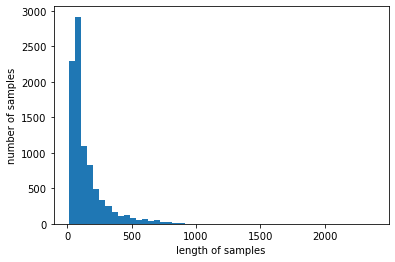

In [7]:
print('뉴스 기사의 최대 길이 : ', max(len(sample) for sample in x_train))
print('뉴스 기사의 평균 길이 : ', sum(len(sample) for sample in x_train) / len(x_train))

plt.hist([len(sample) for sample in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

C:\Users\kwon_notebook\anaconda3\envs\tensorNN\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

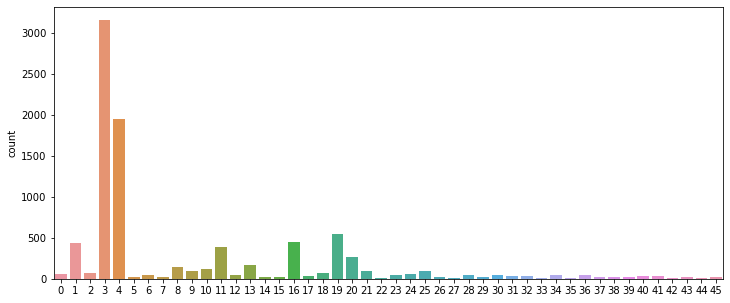

In [8]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(12,5)
sns.countplot(y_train)

In [12]:
word_to_index = reuters.get_word_index()

557056/550378 [==============================] - 0s 0us/step


In [14]:
index_to_word = {}
for key, value in word_to_index.items():
    index_to_word[value+3] = key

In [15]:
print('빈도수 상위 1번 단어 :', index_to_word[4])

빈도수 상위 1번 단어 : the


In [16]:
print('빈도수 상위 128등 단어 :', index_to_word[131])

빈도수 상위 128등 단어 : tax


로이터 자료는 저장된 값에 +3을 해야 실제 매핑된 값임

In [17]:
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index] = token

print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


# LSTM으로 로이터 뉴스 분류

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

vocab_size = 1000
max_len = 100

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=vocab_size, test_split=0.2)

x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

C:\Users\kwon_notebook\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\keras\datasets\reuters.py:113: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\kwon_notebook\AppData\Roaming\Python\Python37\site-packages\tensorflow_core\python\keras\datasets\reuters.py:114: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [19]:
embedding_dim = 128
hidden_units = 128
num_classes = 46

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(num_classes, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['acc']
)
history = model.fit(x_train, y_train, batch_size=128, epochs=30, callbacks=[es, mc], validation_data=(x_test, y_test))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 8982 samples, validate on 2246 samples
Epoch 1/30
8960/8982 [============================>.] - ETA: 0s - loss: 2.6331 - acc: 0.3334
Epoch 00001: val_acc improved from -inf to 0.36198, saving model to best_model.h5
8982/8982 [==============================] - 25s 3ms/sample - loss: 2.6317 - acc: 0.3333 - val_loss: 2.3803 - val_acc: 0.3620
Epoch 2/30
8960/8982 [============================>.] - ETA: 0s - loss: 2.1058 - acc: 0.4440
Epoch 00002: val_acc improved from 0.36198 to 0.50267, saving model to best_model.h5
8982/8982 [==============================] - 26s 3ms/sample - loss: 2.1049 - acc: 0.4443 - val_loss: 1.8920 - val_acc: 0.5027
Epoch 3/30
8960/8982 [============================>.] 

In [20]:
loaded_model = load_model('best_model.h5')
print('\n 테스트 정확도 : %.4f' % (loaded_model.evaluate(x_test, y_test)[1]))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
2246/2246 [==============================] - 3s 1ms/sample - loss: 1.2444 - acc: 0.7070

 테스트 정확도 : 0.7070


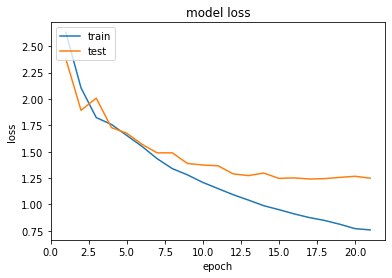

In [21]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()